DONE BY : Madhav Choudhary


Date : 19 October 2023


TASK - 3 DATASCIENCE INTERNSHIP CODSOFT


Mail : choudharymmadhav@gmail.com
Github : https://github.com/madhav918


# Import libary

In [1]:
import numpy as nm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Read Data

In [2]:
df=pd.read_csv("tested.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# Exploring the Dataset:

In [3]:
#Dataset columns
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
df.shape

(418, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# Handling missing values

In [7]:
#find null values
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

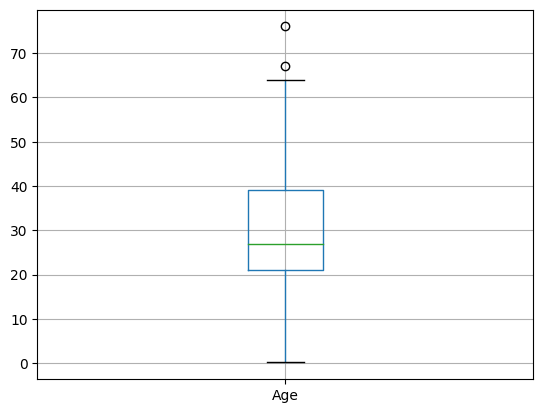

In [8]:
df.boxplot(column=["Age"])
plt.show()

Age column has numerical values so we can replace null values with mean of the column.Therefore replacing null values with mean.

In [9]:
df["Age"].mean()

30.272590361445783

In [10]:
df["Age"].fillna(30.27,inplace=True)

In [11]:
df.dropna(inplace=True)

In [12]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# Handling Duplicate records

In [13]:
df.duplicated().sum()

0

There is no duplicate value

In [14]:
df.drop(["PassengerId","Ticket","Name","Cabin"],axis=1,inplace=True)

In [15]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
12,1,1,female,23.0,1,0,82.2667,S
14,1,1,female,47.0,1,0,61.1750,S
24,1,1,female,48.0,1,3,262.3750,C
26,1,1,female,22.0,0,1,61.9792,C
28,0,1,male,41.0,0,0,30.5000,S


# Handling outliers

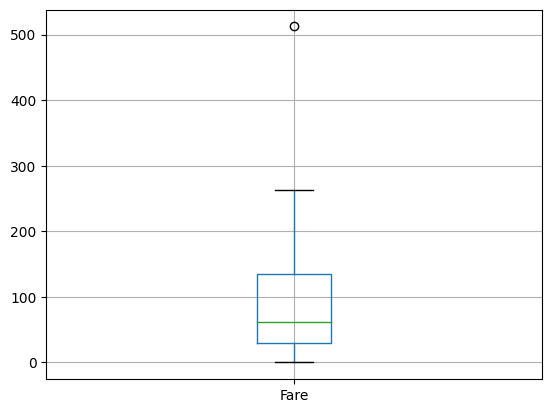

In [16]:
df.boxplot(column=["Fare"])
plt.show()

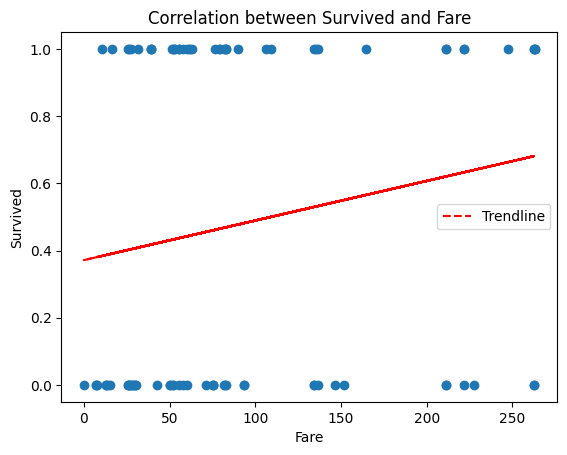

In [17]:
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the Fare column
cleaned_data = df[(df['Fare'] >= lower_bound) & (df['Fare'] <= upper_bound)]

# Print the cleaned dataset
#print(cleaned_data)


# Calculate the trendline
fit = np.polyfit(cleaned_data['Fare'], cleaned_data['Survived'], 1)
trendline = np.polyval(fit, cleaned_data['Fare'])

# Plot the scatter plot with trendline
plt.scatter(cleaned_data['Fare'], cleaned_data['Survived'])
plt.plot(cleaned_data['Fare'], trendline, color='red', linestyle='--', label='Trendline')
plt.xlabel('Fare')
plt.ylabel('Survived')
plt.title('Correlation between Survived and Fare')
plt.legend()
plt.show()

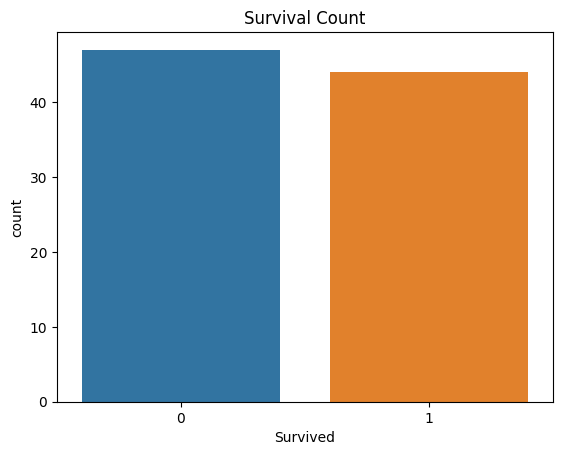

In [18]:
# Exploring the target variable
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()

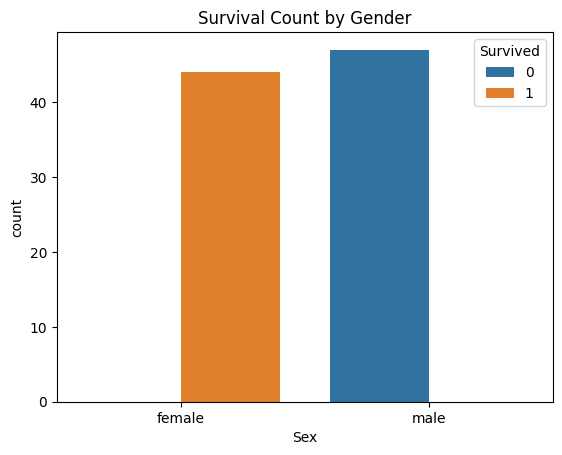

In [19]:
# Exploring categorical variables
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival Count by Gender')
plt.show()

<Axes: >

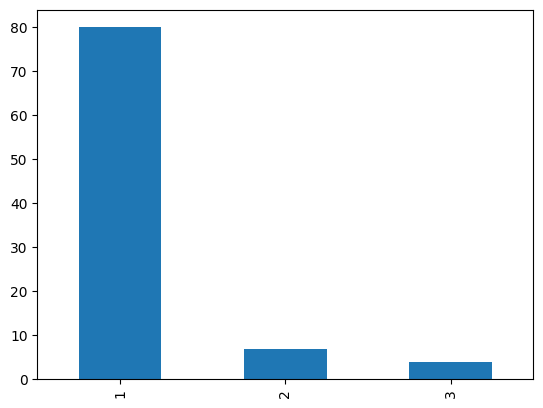

In [20]:
df["Pclass"].value_counts().plot(kind="bar")

array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>],
       [<Axes: title={'center': 'Parch'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

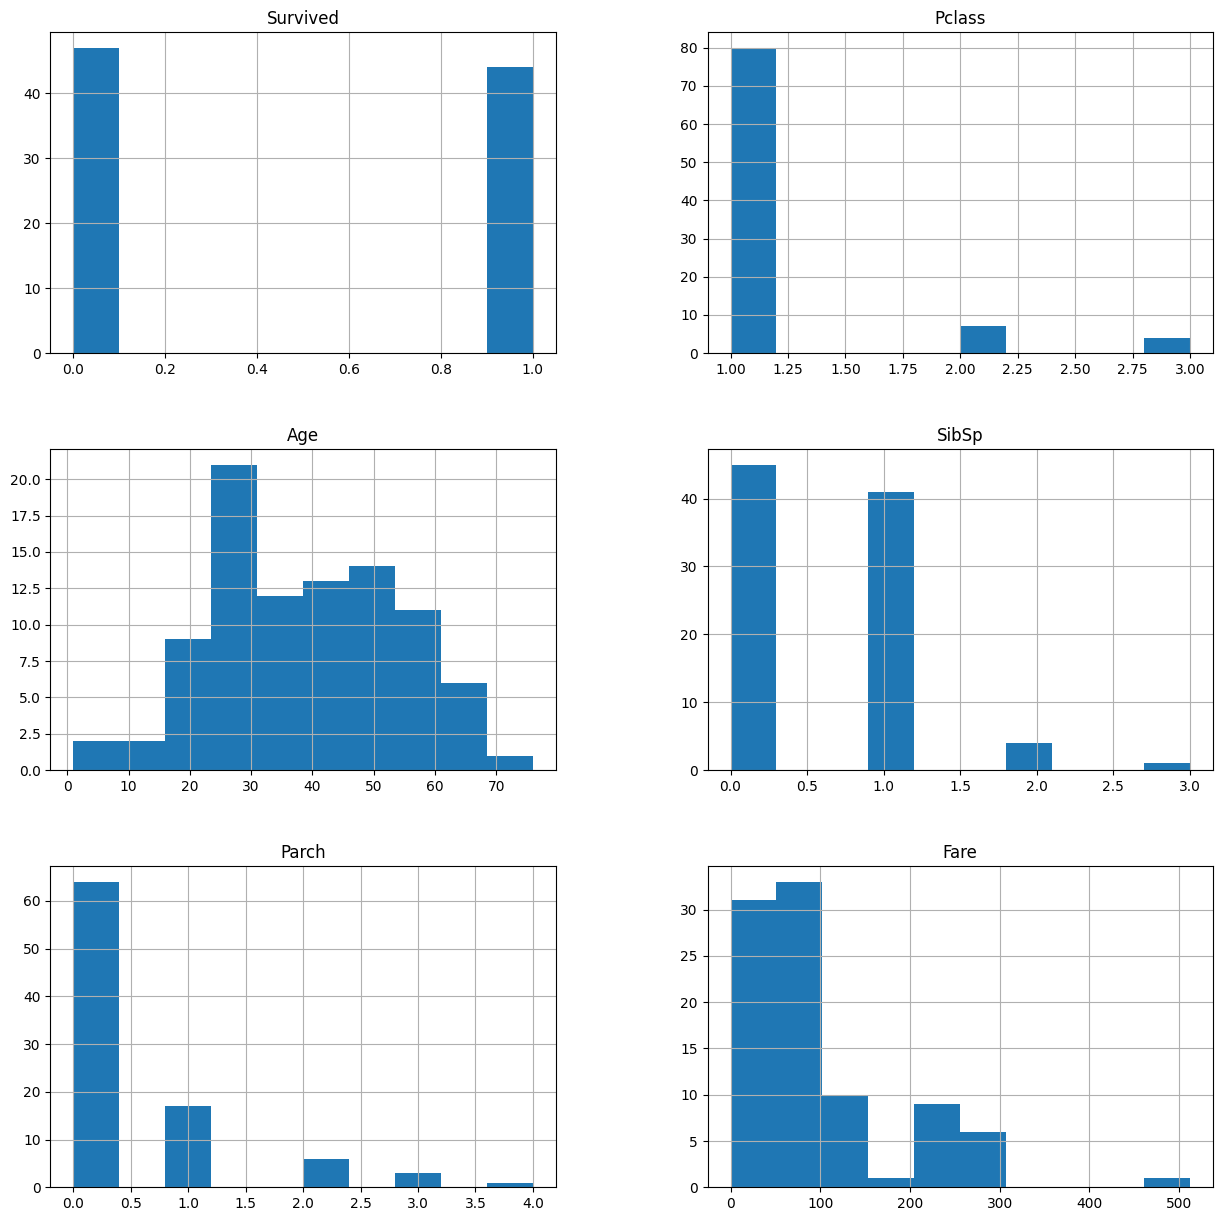

In [21]:
df.hist(figsize=(15, 15))

<Axes: ylabel='Sex'>

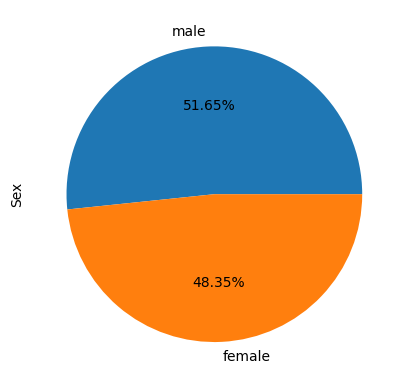

In [22]:
df["Sex"].value_counts().plot(kind="pie", autopct="%.2f%%")

In [23]:
#data preprocessing
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [24]:
x.Sex.value_counts()

male      47
female    44
Name: Sex, dtype: int64

In [25]:
x.Embarked.value_counts()

C    49
S    41
Q     1
Name: Embarked, dtype: int64

In [26]:
#converting categorical columns

df.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [27]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
12,1,female,23.0,1,0,82.2667,S
14,1,female,47.0,1,0,61.1750,S
24,1,female,48.0,1,3,262.3750,C
26,1,female,22.0,0,1,61.9792,C
28,1,male,41.0,0,0,30.5000,S
...,...,...,...,...,...,...,...
404,1,male,43.0,1,0,27.7208,C
405,2,male,20.0,0,0,13.8625,C
407,1,male,50.0,1,1,211.5000,C
411,1,female,37.0,1,0,90.0000,Q


In [28]:
y

12     1
14     1
24     1
26     1
28     0
      ..
404    0
405    0
407    0
411    1
414    1
Name: Survived, Length: 91, dtype: int64

In [29]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
x[["Sex","Embarked"]]=oe.fit_transform(x[["Sex","Embarked"]])

In [30]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

# Logistic Regression

In [31]:
model = LogisticRegression()

In [32]:
model.fit(xtrain,ytrain)

LogisticRegression()

Model Evaluation

Accuracy score

In [33]:
#accuracy on training data
xtrain_prediction = model.predict(xtrain)

In [34]:
print(xtrain_prediction)

[1 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 1 0 0 0 0 1 1 1 0 0 1 0 0 1 1 1 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 0 1 0 1 1 1 0 0]


In [35]:
training_data_accuracy = accuracy_score(ytrain, xtrain_prediction)
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  1.0


In [36]:
#accuracy on testing data
xtest_prediction = model.predict(xtest)

In [37]:
testing_data_accuracy = accuracy_score(ytest, xtest_prediction)
print('Accuracy score of testing data : ', testing_data_accuracy)

Accuracy score of testing data :  1.0


# Support Vector Classifier

In [38]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

In [39]:
linsvc=LinearSVC(random_state=1)
linsvc.fit(xtrain,ytrain)
ypred=linsvc.predict(xtest)

In [40]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(accuracy_score(ytest,ypred))
print(confusion_matrix(ytest,ypred))
print(classification_report(ytest,ypred))

1.0
[[ 9  0]
 [ 0 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        10

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19



# AdaBoost Classifier

In [41]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

In [42]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)

    train=model.score(xtrain,ytrain)
    test=model.score(xtest,ytest)

    print(f"Training Accuracy : {train}\nTesting Accuracy : {test}\n\n")
    print(classification_report(ytest,ypred))

    return model

In [43]:
mymodel(AdaBoostClassifier())

Training Accuracy : 1.0
Testing Accuracy : 1.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        10

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19



AdaBoostClassifier()

# GradientBoosting Classifier

In [44]:
mymodel(GradientBoostingClassifier())

Training Accuracy : 1.0
Testing Accuracy : 1.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        10

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19



GradientBoostingClassifier()

Conclusion: In this project I performed import the libary and clean the data then perform EDA on it After performing EDA split the data into train test and on that applied algorithms like Logistic Regression, Support Vector Classifier, AdaBoostClassifier and GradientBoostingClassifier their accuracy is 1.